In [71]:
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt

In [72]:
with open('make_models.pkl', 'rb') as f:
    loaded = pickle.load(f)

# Flattens the list of lists of tuples into a single list of tuples.
squashed = [model for make in loaded for model in make]
print(len(squashed))

858


In [73]:
# Uncomment code below if importing from a pickle file.
#with open('all_cars.pkl', 'rb') as f:
#    df = pickle.load(f)

# Use this code if importing from a CSV file.
df = pd.read_csv('full_cars.csv')

# Many of the obtained missing values are listed as 'NA' by default. 
df = df.replace('NA', np.nan)
df.reset_index(drop=True, inplace=True)

display(df.info(verbose=True, show_counts=True))
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 148 columns):
 #    Column                                                                                        Non-Null Count  Dtype  
---   ------                                                                                        --------------  -----  
 0    Unnamed: 0                                                                                    3748 non-null   int64  
 1    make                                                                                          3748 non-null   object 
 2    model                                                                                         3748 non-null   object 
 3    style                                                                                         3748 non-null   object 
 4    trim                                                                                          3748 non-null   object 
 5    year              

None

,Unnamed: 0,make,model,style,trim,year,price,EPA Classification,Drivetrain,Engine Order Code,...,Cargo Space/Area Length @ Floor to Console,Fourth Row Head Room (inches),Fourth Row Leg Room (inches),Fourth Row Shoulder Room (inches),Fourth Row Hip Room (inches),Cargo Space/Area Behind Fourth Row (cubic feet),Fifth Row Head Room (inches),Fifth Row Leg Room (inches),Fifth Row Shoulder Room (inches),Fifth Row Hip Room (inches)
0,0,acura,ilx,Acura ILX,ILX Sedan w/Technology/A-Spec Package,2022,"$34,295",Compact Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,acura,ilx,Acura ILX,ILX Sedan w/Premium/A-Spec Package,2022,"$32,395",Compact Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,acura,ilx,Acura ILX,ILX Sedan w/Premium Package,2022,"$30,395",Compact Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,acura,ilx,Acura ILX,ILX Sedan,2022,"$28,395",Compact Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,acura,integra,Acura Integra,Integra Manual w/A-Spec Tech Package,2024,"$37,695",Large Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,acura,integra,Acura Integra,Integra CVT w/A-Spec Tech Package,2024,"$37,695",Large Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,acura,integra,Acura Integra,Integra CVT w/A-Spec Package,2024,"$34,695",Large Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,acura,integra,Acura Integra,Integra CVT,2024,"$32,695",Large Cars,Front Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,acura,mdx,Acura MDX,MDX SH-AWD w/Technology Package,2023,"$57,645",Small SUV 4WD,All Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,acura,mdx,Acura MDX,MDX SH-AWD w/A-Spec Package,2023,"$61,145",Small SUV 4WD,All Wheel Drive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Only two models have a fourth row option. These won't be kept in this analysis. 
df['style'][df['Fourth Row Head Room (inches)'].notna()].unique()

array(['Chevrolet Express', 'GMC Savana'], dtype=object)

In [75]:
cols_to_keep = ['make', 'model', 'style', 'trim', 'price', 'EPA Classification', 'Drivetrain', 
                'Engine Type and Required Fuel', 'Displacement (liters/cubic inches)', 'Maximum Horsepower @ RPM',
                'Maximum Torque @ RPM', 'Transmission Description', 'Number of Transmission Speeds',
                'CO2 Emissions, 15K mi/year (tons)', 'Range, city/highway (miles)', 
                'EPA Fuel Economy, combined/city/highway (mpg)', 
                'EPA Fuel Economy Equivalent (for hybrid and electric vehicles), combined/city/highway (MPGe)', 
                'Wheelbase (inches)', 'Length (inches)', 'Width, without mirrors (inches)', 'Height (inches)', 
                'Passenger / Seating Capacity', 'Total Passenger Volume (cubic feet)', 'Front Head Room (inches)', 
                'Front Leg Room (inches)', 'Front Shoulder Room (inches)', 'Front Hip Room (inches)', 
                'Second Row Head Room (inches)', 'Second Row Leg Room (inches)', 'Second Row Shoulder Room (inches)', 
                'Second Row Hip Room (inches)', 'Front Suspension Type', 'Rear Suspension Type', 
                'Front Wheel Size (inches)', 'Rear Wheel Size (inches)', 'Maximum Towing Capacity (pounds)', 
                'Maximum Trailer Weight, dead weight hitch (pounds)', 'Base Curb Weight (pounds)', 'Overall Rating', 
                'Overall Frontal Barrier Crash Rating', 'Frontal Barrier Crash Rating Driver', 
                'Frontal Barrier Crash Rating Passenger', 'Overall Side Crash Rating', 'Side Barrier Rating', 
                'Side Barrier Rating Driver', 'Side Barrier Rating Passenger Rear Seat', 
                'Side Pole Rating Driver Front Seat', 'Combined Side Rating Front Seat', 'Combined Side Rating Rear Seat', 
                'Rollover Rating', 'Trunk Space (cubic feet)', 'Cargo Space/Area with Rear Seat Down', 
                'Cargo Space/Area with Rear Seat Up', 'Cargo Space/Area (cubic feet)', 'Third Row Head Room (inches)', 
                'Third Row Leg Room (inches)', 'Third Row Shoulder Room (inches)', 'Third Row Hip Room (inches)'                
               ]

df = df.filter(cols_to_keep)

In [76]:
# Converts the 'price' column to int.
df.price = df.price.replace('[$,]', '', regex=True).astype(int)
# Keeps only the lowest-priced style and trim per make and model. 
df = df.loc[df.groupby(['make', 'model']).price.idxmin()]

df.price.describe()

count    6.670000e+02
mean     6.951899e+04
std      1.064285e+05
min      0.000000e+00
25%      2.889500e+04
50%      4.139500e+04
75%      6.913750e+04
max      1.420112e+06
Name: price, dtype: float64

In [77]:
# Dropping 0 valued price entries.
print(df[['style', 'trim']][df['price']==0])
df.drop(df.loc[df['price']==0].index, inplace=True)

                            style  \
481                  Cadillac XT4   
839        Ferrari 599GTB Fiorano   
1456      Honda Clarity fuel cell   
2059  Lamborghini Gallardo Spyder   
2294                  Lotus Emira   
2424  McLaren 650S / 675LT Spider   
2432         McLaren 765LT Spider   
2437       McLaren MP4-12C Spider   
2990          Rolls-Royce Phantom   
3250  Toyota Corolla Cross hybrid   
3331                Toyota Sienna   

                                                trim  
481                       XT4 FWD 4dr Premium Luxury  
839                          599 2dr Cpe GTB Fiorano  
1456                         Clarity Fuel Cell Sedan  
2059          Gallardo 2dr Cpe LP570-4 Squadra Corse  
2294                    Emira V6 First Edition Coupe  
2424                                   675LT 2dr Cpe  
2432                                    765LT Spider  
2437                         MP4-12C 2dr Conv Spider  
2990                Phantom Extended Wheelbase Sedan  
3250 

In [78]:
cars_present = list(zip(df.make, df.model))
cars_missing = [x for x in squashed if x not in cars_present]

In [79]:
display(df.info(verbose=True, show_counts=True))
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 3 to 3616
Data columns (total 58 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   make                                                                                          656 non-null    object 
 1   model                                                                                         656 non-null    object 
 2   style                                                                                         656 non-null    object 
 3   trim                                                                                          656 non-null    object 
 4   price                                                                                         656 non-null    int32  
 5   EPA Classification          

None

,make,model,style,trim,price,EPA Classification,Drivetrain,Engine Type and Required Fuel,Displacement (liters/cubic inches),Maximum Horsepower @ RPM,...,Combined Side Rating Rear Seat,Rollover Rating,Trunk Space (cubic feet),Cargo Space/Area with Rear Seat Down,Cargo Space/Area with Rear Seat Up,Cargo Space/Area (cubic feet),Third Row Head Room (inches),Third Row Leg Room (inches),Third Row Shoulder Room (inches),Third Row Hip Room (inches)
3,acura,ilx,Acura ILX,ILX Sedan,28395,Compact Cars,Front Wheel Drive,Premium Unleaded I-4,2.4 L/144,201 @ 6800,...,5/5,4/5,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,acura,integra,Acura Integra,Integra CVT,32695,Large Cars,Front Wheel Drive,Intercooled Turbo Premium Unleaded I-4,1.5 L/91,200 @ 6000,...,NaN,NaN,NaN,NaN,24.3,NaN,NaN,NaN,NaN,NaN
13,acura,mdx,Acura MDX,MDX FWD,50745,Small SUV 2WD,Front Wheel Drive,Premium Unleaded V-6,3.5 L/212,290 @ 6200,...,5/5,4/5,NaN,NaN,NaN,NaN,36.2,29,55.1,40.6
16,acura,nsx,Acura NSX,NSX Type S Coupe,171495,Two Seaters,All Wheel Drive,Twin Turbo Gas/Electric V-6,3.5 L/213,600 @ 6500,...,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,acura,rdx,Acura RDX,RDX FWD,42745,Small SUV 2WD,Front Wheel Drive,Intercooled Turbo Premium Unleaded I-4,2.0 L/122,272 @ 6500,...,5/5,4/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,acura,rl,Acura RL,RL Automatic,49095,Mid-Size,All Wheel Drive,Gas V6,3.7L/224,300 @ 6300,...,NaN,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,acura,rlx,Acura RLX,RLX Sedan w/Technology Pkg,55925,Midsize Cars,Front Wheel Drive,Premium Unleaded V-6,3.5 L/212,310 @ 6500,...,5/5,5/5,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,acura,tl,Acura TL,TL 2WD Automatic,36950,Midsize Cars,Front Wheel Drive,Premium Unleaded V-6,3.5 L/212,280 @ 6200,...,4/5,5/5,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,acura,tlx,Acura TLX Type S,TLX FWD,41045,Compact Cars,Front Wheel Drive,Intercooled Turbo Premium Unleaded I-4,2.0 L/122,272 @ 6500,...,5/5,5/5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,acura,tsx,Acura TSX Sport Wagon,TSX Automatic,31555,Compact Cars,Front Wheel Drive,Premium Unleaded I-4,2.4 L/144,201 @ 7000,...,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#df['Total Passenger Volume (cubic feet)'].max()
cols_to_int = ['price', 'Number of Transmission Speeds', 'Range, city/highway (miles)']

In [81]:
for col in df.columns:   
    print(col, df[col].unique(), '\n\n')

make ['acura' 'alfa-romeo' 'aston-martin' 'audi' 'bentley' 'bmw' 'buick'
 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'ferrari' 'fiat' 'fisker'
 'ford' 'genesis' 'gmc' 'honda' 'hummer' 'hyundai' 'infiniti' 'jaguar'
 'jeep' 'kia' 'lamborghini' 'land-rover' 'lexus' 'lincoln' 'lordstown'
 'lotus' 'maserati' 'mazda' 'mclaren' 'mercedes-amg' 'mercedes-benz'
 'mercedes-maybach' 'mercury' 'mini' 'mitsubishi' 'nissan' 'polestar'
 'pontiac' 'porsche' 'ram' 'rivian' 'rolls-royce' 'saab' 'saturn' 'scion'
 'smart' 'subaru' 'suzuki' 'tesla' 'toyota' 'vinfast' 'volkswagen' 'volvo'] 


model ['ilx' 'integra' 'mdx' 'nsx' 'rdx' 'rl' 'rlx' 'tl' 'tlx' 'tsx' 'zdx' '4c'
 'giulia' 'giulia-quadrifoglio' 'stelvio' 'stelvio-quadrifoglio' 'tonale'
 'db11' 'db9-gt' 'dbs' 'dbx' 'rapide' 'vanquish' 'vantage' 'virage' 'a3'
 'a3-sportback-e-tron' 'a4' 'a4-allroad-quattro' 'a5' 'a5-sportback' 'a6'
 'a6-allroad' 'a7' 'a8' 'e-tron-gt' 'q3' 'q4-e-tron' 'q5' 'q7' 'q8'
 'q8-e-tron' 'r8' 'rs-q8' 'rs3' 'rs4' 'rs5' 'rs5-sportb

In [82]:
# Displacement (liters/cubic inches) ['2.4 L/144' 
# Maximum Horsepower @ RPM ['201 @ 6800'
# Maximum Torque @ RPM ['180 @ 3600'
# Range, city/highway (miles) ['316.80 / 448.80'
# EPA Fuel Economy, combined/city/highway (mpg) ['28 / 24 / 34'
# EPA Fuel Economy Equivalent (for hybrid and electric vehicles), combined/city/highway (MPGe) ['N/A / N/A / N/A'

In [83]:
cols_remove_par = ['CO2 Emissions, 15K mi/year (tons)', 'EPA Fuel Economy, combined/city/highway (mpg)']

for col in cols_remove_par:
    df[col] = df[col].apply(lambda x: re.sub(r'\([^)]*\)', '', str(x)))

In [84]:
cols_to_num = ['Number of Transmission Speeds',
                'CO2 Emissions, 15K mi/year (tons)', 
                'Wheelbase (inches)', 'Length (inches)', 'Width, without mirrors (inches)', 'Height (inches)', 
                'Passenger / Seating Capacity', 'Total Passenger Volume (cubic feet)', 'Front Head Room (inches)', 
                'Front Leg Room (inches)', 'Front Shoulder Room (inches)', 'Front Hip Room (inches)', 
                'Second Row Head Room (inches)', 'Second Row Leg Room (inches)', 'Second Row Shoulder Room (inches)', 
                'Second Row Hip Room (inches)', 'Front Wheel Size (inches)', 'Rear Wheel Size (inches)', 
                'Maximum Towing Capacity (pounds)', 
                'Maximum Trailer Weight, dead weight hitch (pounds)', 'Base Curb Weight (pounds)', 
                'Trunk Space (cubic feet)', 'Cargo Space/Area with Rear Seat Down', 
                'Cargo Space/Area with Rear Seat Up', 'Cargo Space/Area (cubic feet)', 'Third Row Head Room (inches)', 
                'Third Row Leg Room (inches)', 'Third Row Shoulder Room (inches)', 'Third Row Hip Room (inches)',
                'Overall Rating', 'Overall Frontal Barrier Crash Rating', 'Frontal Barrier Crash Rating Driver', 
                'Frontal Barrier Crash Rating Passenger', 'Overall Side Crash Rating', 'Side Barrier Rating', 
                'Side Barrier Rating Driver', 'Side Barrier Rating Passenger Rear Seat', 
                'Side Pole Rating Driver Front Seat', 'Combined Side Rating Front Seat', 'Combined Side Rating Rear Seat', 
                'Rollover Rating']

In [85]:
for col in cols_to_num:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: x.split(' ')[0])
    df[col] = df[col].apply(lambda x: x.split('/')[0])
    df[col] = df[col].apply(lambda x: re.sub('[^0-9.]','', x))
    df[col] = df[col].apply(lambda x: None if not x else x)
    df[col] = df[col].astype(float)

In [86]:
safety_cols = ['Overall Rating', 'Overall Frontal Barrier Crash Rating', 'Frontal Barrier Crash Rating Driver', 
                'Frontal Barrier Crash Rating Passenger', 'Overall Side Crash Rating', 'Side Barrier Rating', 
                'Side Barrier Rating Driver', 'Side Barrier Rating Passenger Rear Seat', 
                'Side Pole Rating Driver Front Seat', 'Combined Side Rating Front Seat', 'Combined Side Rating Rear Seat', 
                'Rollover Rating']

In [87]:
for col in df[cols_to_num]:   
    print(col, df[col].unique(), '\n\n')

Number of Transmission Speeds [ 8.  1. 10.  9.  6.  5.  7.  2.  4. nan] 


CO2 Emissions, 15K mi/year (tons) [  6.3   nan   8.1   8.4   7.4   9.1   7.6   7.8   7.1   6.9   9.6   6.6
   8.9   9.4   8.8  11.8  10.4  11.1  11.2  12.2   5.6   6.8   6.5   7.7
   8.    9.8   8.5  16.9   9.9  14.7   6.2   6.1   6.4   9.3  11.    7.3
   7.   13.1  10.7 252.    5.5   7.2   5.3   5.9   0.8  10.6   7.5   6.7
   6.   13.6   9.   12.6  13.5   4.4   9.2   4.8   5.1   5.7   5.2   3.4
  12.4   4.9   3.    8.3   8.7  11.5  11.6  16.1  12.7   4.2  10.2  15.5
   4.3  10.3   5.8   4.6  12.3  10.1   4.5   5.4  10.5  14.8  10.    5.
   3.1   3.8] 


Wheelbase (inches) [105.1  107.7  113.8  103.5  108.3  110.2  112.2  109.3  113.   106.5
  93.7  111.   103.8  110.4  107.9  120.5  117.7  110.9  108.8  111.2
 115.1  115.2  123.2  114.1  105.5  108.7  117.9  115.3  104.3  103.6
 108.9  111.3   98.6  132.5  122.7  125.8  128.6  104.7  112.4  117.1
 120.9  126.6  111.1  119.   101.2  118.1  108.1  112.5  116.7  1

In [88]:
# Run to show missing makes and models. 
# Note that the ones manually added are present, but will show up as missing here. 
# Missing models tend to be high end or unusual cars.

# cars_missing

Text(0.5, 1.0, 'Cheapest Third-Row Vehicles')

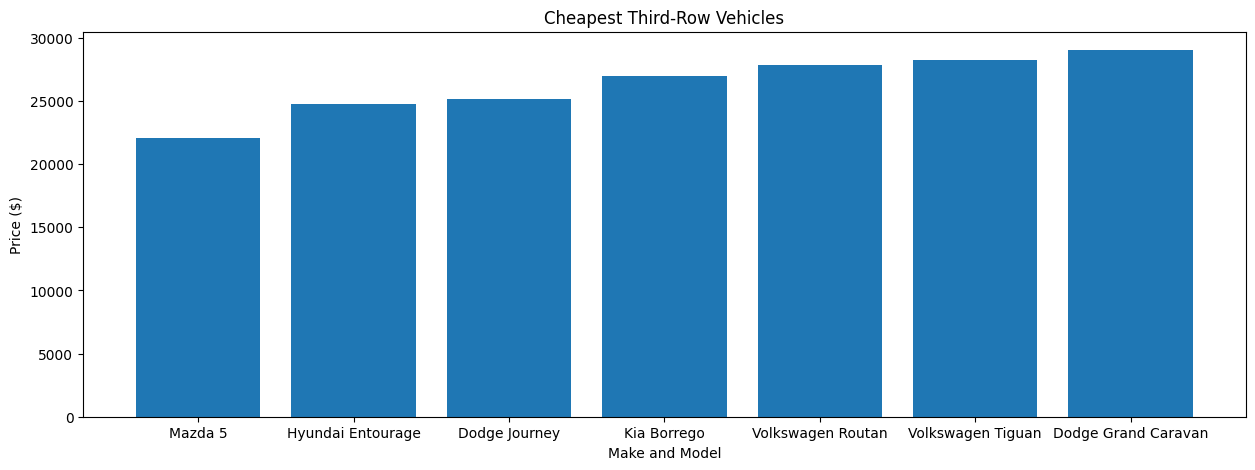

In [98]:
df_3rd_row = df[df['Third Row Leg Room (inches)'].notna()]
df_3rd_row = df_3rd_row.sort_values('price')

n = 7
prices = df_3rd_row.loc[:, 'price'][:n]
styles = df_3rd_row.loc[:, 'style'][:n]

fig = plt.figure(figsize = (15, 5))
plt.bar(styles, prices)
plt.xlabel('Make and Model')
plt.ylabel('Price ($)')
plt.title('Cheapest Third-Row Vehicles')

Text(0.5, 1.0, 'Vehicles with the Most Third-Row Legroom')

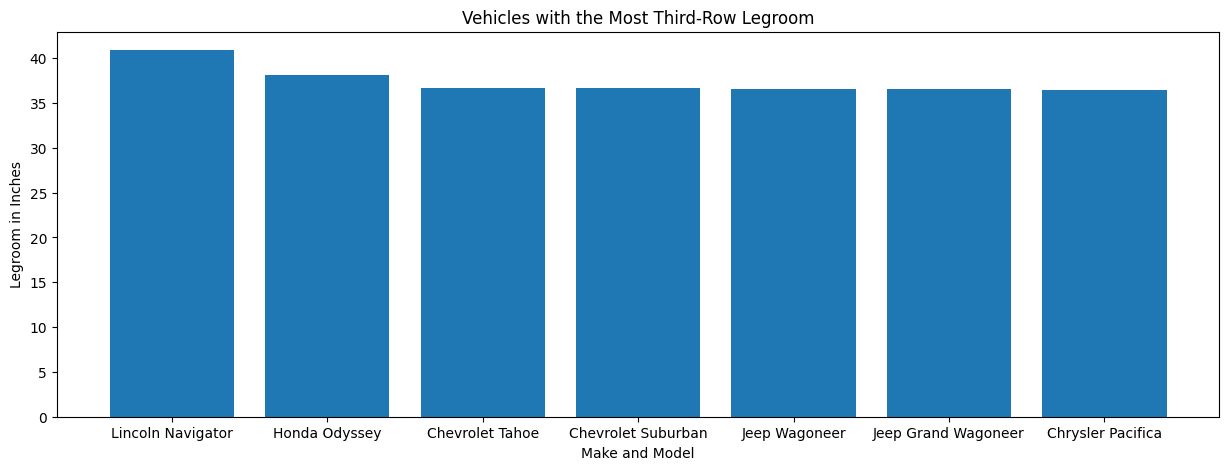

In [100]:
df_3rd_row = df_3rd_row.sort_values('Third Row Leg Room (inches)', ascending=False)

n = 7
room = df_3rd_row.loc[:, 'Third Row Leg Room (inches)'][:n]
styles = df_3rd_row.loc[:, 'style'][:n]

fig = plt.figure(figsize = (15, 5))
plt.bar(styles, room)
plt.xlabel('Make and Model')
plt.ylabel('Legroom in Inches')
plt.title('Vehicles with the Most Third-Row Legroom')